# Wisconsin Diagnostic Breast Cancer (WDBC)# Jihan Syania -  Final Project

1. Logistic Regression
2. SVM
3. Random Forest

In [62]:
#import library
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import klib

import sklearn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

## Load Datasets

In [63]:
df = pd.read_csv(r'E:\2. Informal School\17, Machine Learning\final project/bcw.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
drop_col = ['id', 'Unnamed: 32']
df = df.drop(drop_col, axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [66]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Grouping Data

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

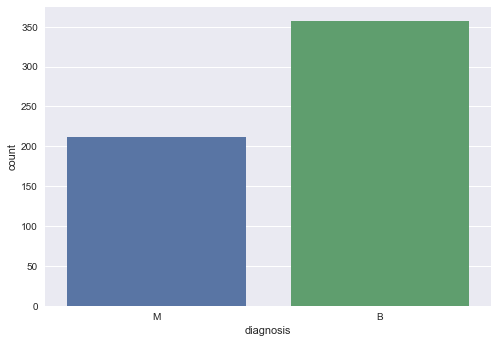

In [67]:
sns.countplot(x=df['diagnosis'])

In [68]:
df.groupby('diagnosis').mean()
#B = benign
#M = malignant 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [69]:
#concave points = jumlah bagian cekung dari kontur
df_diagnosis = df.groupby('diagnosis')['concave points_mean'].sum()
df_diagnosis

diagnosis
B     9.181114
M    18.653880
Name: concave points_mean, dtype: float64

<BarContainer object of 2 artists>

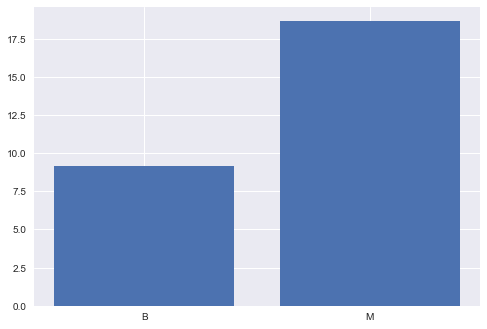

In [70]:
plt.bar(df_diagnosis.index, df_diagnosis)

#

## Data Visualization

<AxesSubplot:>

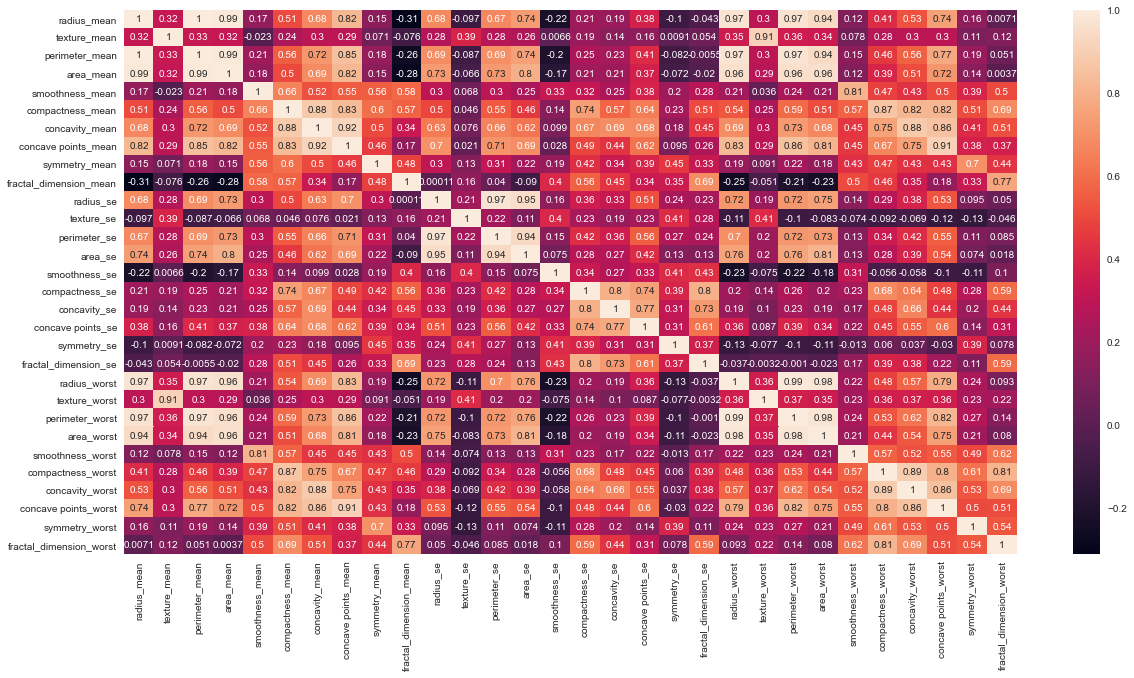

In [71]:
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='concavity_mean', ylabel='Density'>

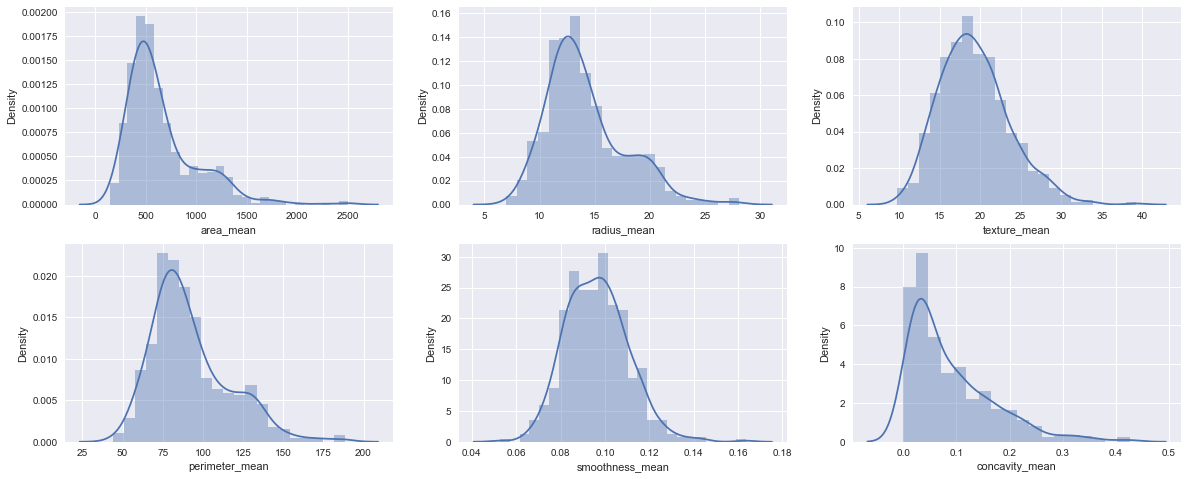

In [72]:
#CHECKING DISTRIBUTION OF DATA IN FEATURES
fig, axes = plt.subplots(2,3,figsize=(20,8))
sns.distplot(df['area_mean'],ax = axes[0,0])
sns.distplot(df['radius_mean'],ax = axes[0,1])
sns.distplot(df['texture_mean'],ax = axes[0,2])
sns.distplot(df['perimeter_mean'],ax = axes[1,0])
sns.distplot(df['smoothness_mean'],ax = axes[1,1])
sns.distplot(df['concavity_mean'],ax = axes[1,2])

##

## Preprocess Data

#### Z-Score Method (Removing Outlier)

In [73]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df[df.iloc[:,1:].columns]))
threshold(z,df[df.iloc[:,1:].columns])

With threshold 3.0 data loss is 13.01%
With threshold 3.2 data loss is 10.72%
With threshold 3.4 data loss is 9.14%
With threshold 3.6 data loss is 7.73%
With threshold 3.8 data loss is 6.68%
With threshold 4.0 data loss is 5.98%
With threshold 4.2 data loss is 5.27%
With threshold 4.4 data loss is 4.39%
With threshold 4.6 data loss is 3.69%
With threshold 4.8 data loss is 2.99%


In [75]:
df.shape[0]

569

In [76]:
df_c=df[(z<3.4).all(axis=1)]
df_c.shape[0]

517

#### Handling Imbalance Dataset

In [77]:
print('Number of Benign =', df_c['diagnosis'].value_counts()[0])
print('Number of Malignan =', df_c['diagnosis'].value_counts()[1])

Number of Benign = 338
Number of Malignan = 179


In [79]:
df_b = df_c[df.diagnosis == 'B']
df_m = df_c[df.diagnosis == 'M']

In [80]:
b = df_b.sample(n=179, random_state=78)

In [81]:
df_new = pd.concat([b, df_m], axis = 0)
df_new['diagnosis'].value_counts()

M    179
B    179
Name: diagnosis, dtype: int64

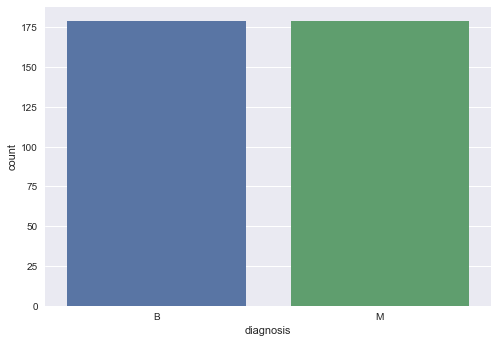

In [82]:
sns.countplot(x='diagnosis', data=df_new)
plt.show()

#### Handling Categorical Values (label Encoder)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [83]:
df_c['diagnosis_label'] = le.fit_transform(df_c['diagnosis'])
df_c

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,1
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1


In [84]:
df_clean=df_c.drop(['diagnosis'], axis=1)
df_clean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1


####

## Split Data

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df_clean.columns.values

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_label'], dtype=object)

In [87]:
X = df_clean[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y = df_clean[['diagnosis_label']]

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 30), (361, 1), (156, 30), (156, 1))

#### Feature Scalling

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

####

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [91]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [92]:
Y_LR = LR.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_LR = accuracy_score(Y_test, Y_LR)
print('ACCURACY SCORE: ',acc_LR)

ACCURACY SCORE:  0.9807692307692307


####

## SVM

#### 1. Data Modelling (SVC)

In [94]:
from sklearn import svm
from sklearn.svm import SVC

In [95]:
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')

In [96]:
svm_model.fit(X_train,Y_train)

SVC(C=1, gamma='auto')

In [97]:
svm_score = svm_model.score(X_train,Y_train)
print('Model Accuracy:', svm_score)

Model Accuracy: 0.9889196675900277


#### 2. Hyperparameter Tunning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
params = {'C': [0.5, 1, 10],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly']}

In [100]:
g = GridSearchCV(SVC(), params, cv=2)
g.fit(X_train,Y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']})

In [101]:
print(g.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [102]:
best_params = g.best_params_
svm_clf = SVC(**best_params)
svm_clf.fit(X_train,Y_train)

SVC(C=10, gamma=0.01)

In [103]:
svm_clf.score(X_train,Y_train)

0.9916897506925207

####

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [105]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [106]:
model_score = rf_clf.score(X_test, Y_test)
print('Model Accuracy:', model_score)

Model Accuracy: 0.9487179487179487


In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
Y_train_pred = rf_clf.predict(X_train)
Y_test_pred = rf_clf.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_train, Y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(Y_train, Y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(Y_train, Y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_test, Y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(Y_test, Y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(Y_test, Y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       125

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361

Confussion Matrix ------------------------------------
[[236   0]
 [  0 125]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.9487179487179487
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.90      0.96      0.93        54

    accuracy                           0.95       156
   macro avg       0.94      0.95      0.94       156
weighted avg       0.95      0.95      0.95       156

Confussion Matrix ---------------------------------

##

## Check Confusion Matrix

<AxesSubplot:>

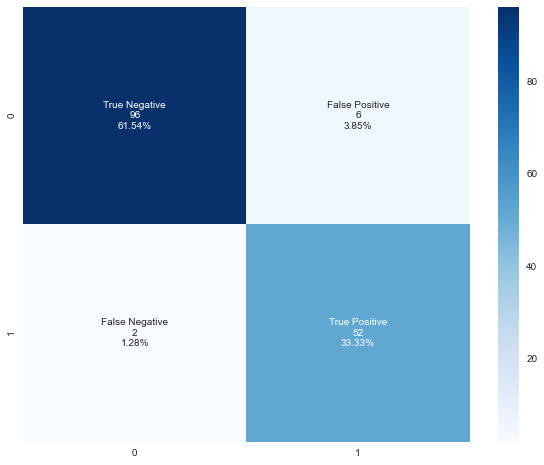

In [109]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

##

## Check Importance Score

In [110]:
data_vars = df_clean.columns.values.tolist()
y = ['diagnosis_label']
X = [i for i in data_vars if i not in y]

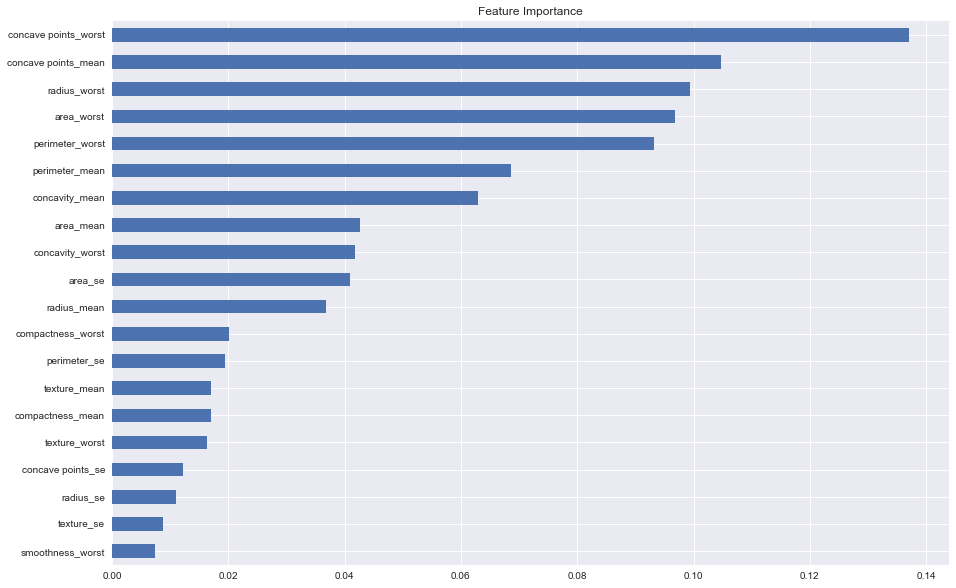

In [111]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()